Use SVD to compress an image

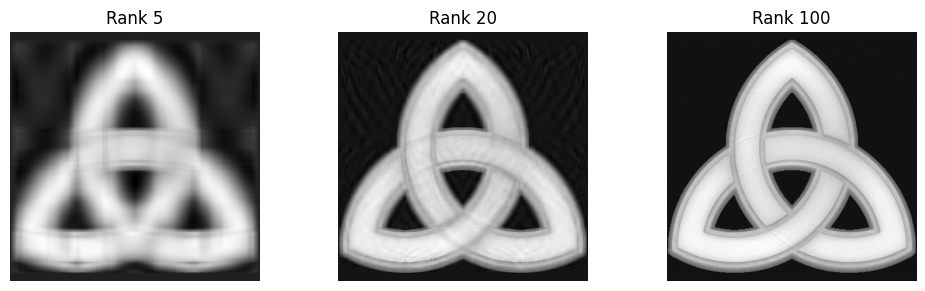

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import display, Latex, Math

A = imread('/workspaces/steve-brunton-book/images/favicon.png')
X = np.mean(A, -1);   # Convert RGB to grayscale
# img = plt.imshow(X)

# Take the SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

# Approximate matrix with truncated SVD for various ranks r
fig, axes = plt.subplots(1, 3, figsize=(10, 3))  # Create subplots
ranks = [5, 20, 100]

for ax, r in zip(axes, ranks):
    Xapprox = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    ax.imshow(Xapprox, cmap='gray')
    ax.set_title(f'Rank {r}')
    ax.axis('off')

plt.tight_layout()
plt.show()

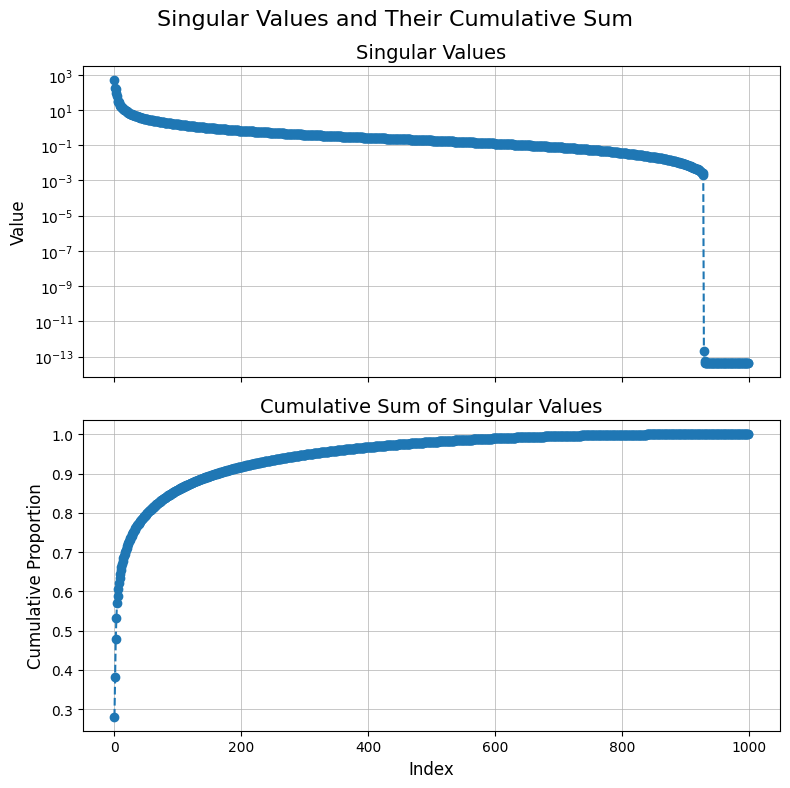

In [25]:
# Plot singular values and cumulative sum of singular values
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)  
fig.suptitle('Singular Values and Their Cumulative Sum', fontsize=16)

# Plot singular values
ax1.semilogy(np.diag(S), '--o', label='Singular Values')
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
ax1.set_title('Singular Values', fontsize=14)
ax1.set_ylabel('Value', fontsize=12)

# Plot cumulative sum of singular values
ax2.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)), '--o', label='Cumulative Sum')
ax2.grid(True, which='both', linestyle='-', linewidth=0.5)
ax2.set_title('Cumulative Sum of Singular Values', fontsize=14)
ax2.set_xlabel('Index', fontsize=12)
ax2.set_ylabel('Cumulative Proportion', fontsize=12)

plt.tight_layout()
plt.show()
